In [1]:
import PIL
from PIL import Image
import matplotlib

import numpy as np
import pandas as pd

import ast
import re

import json

### **Load Images**

Currently I saved all the images and their information in a csv, which means I don't need to open lots of images when I run my code, but it also means I have to decode the strings in the csv to get my images and labels

In [2]:
train_df = pd.read_csv("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\data_csv\\train_dataset.csv")
val_df = pd.read_csv("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\data_csv\\val_dataset.csv")
test_df = pd.read_csv("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\data_csv\\test_dataset.csv")

In [23]:
# get all unique category ids in the training data
train_cateid = np.unique(list(train_df['category_id']))

In [20]:
train_df.head()

,image_path,image_info,category_id
0,C:\Users\KurtJi\OneDrive - University of Illin...,"['2018-04-21 22:01:00+00:00', [27.83488, -97.0...",3198
1,C:\Users\KurtJi\OneDrive - University of Illin...,"['2019-07-27 22:30:48+00:00', [31.90883, -109....",9217
2,C:\Users\KurtJi\OneDrive - University of Illin...,"['2018-05-13 14:39:46+00:00', [-34.6054, -58.3...",1978
3,C:\Users\KurtJi\OneDrive - University of Illin...,"['2019-09-23 18:00:59+00:00', [38.73597, -90.7...",5244
4,C:\Users\KurtJi\OneDrive - University of Illin...,"['2018-06-08 18:01:00+00:00', [16.73704, -92.6...",4214


In [24]:
def get_image_label(cateid: int, categories, type: str):
    # categories should look like this: test_ann['categories']
    # print(categories)
    cate_list = list(categories[0][0].keys())[1:]
    # print(cate_list)
    if type not in cate_list:
        return "please enter correct category level"

    return categories[0][cateid][type]

In [29]:
# Define a function to load and preprocess images
def load_and_preprocess_images(df, type:str, catetype: str):
    image_data = []
    image_info = []
    labels = []

    if type not in ['train', 'val', 'test']:
        print("please enter correct data name!")
        return

    # Validating data
    with open(f"C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\train_mini_sample.json", 'r') as file:
        # Load JSON data from the file
        ann = json.load(file)

    for index, row in df.iterrows():

        image_path = row['image_path']
        info = ast.literal_eval(row['image_info'])
        # get category name
        cate_id = row['category_id']

        # do not read the classes not in training data
        if type == 'val' or type == 'test':
            if cate_id not in train_cateid:
                # skip if category is not in training set
                continue
            
        # get label
        categories = ann['categories']
        label = get_image_label(cate_id, categories, catetype)
        # Load and preprocess the image
        image = Image.open(image_path)
        # reshape image
        image = image.resize((224, 224))
        # Apply any necessary preprocessing (resize, normalize, etc.)
        image = np.array(image)  # Convert to NumPy array if needed

        image_data.append(image)
        labels.append(label)

    return np.array(image_data), np.array(image_info), np.array(labels)

In [38]:
train_data, train_info, train_labels = load_and_preprocess_images(train_df, 'train', 'family')
val_data, val_info, val_labels = load_and_preprocess_images(val_df, 'val', 'family')
test_data, test_info, test_labels = load_and_preprocess_images(test_df, 'test', 'family')

In [39]:
np.shape(train_data[99])

(224, 224, 3)

In [40]:
len(train_data)

39997

## **Image Processing**

### **Denoising using fft**

## **Modeling**

## ****

In [ ]:
%pip install tensorflow

In [15]:
# some tf-specific processing
# train_data_tf = np.array(train_data)
# train_labels_tf = np.array(train_labels)

# val_data_tf = np.array(val_data)
# val_labels_tf = np.array(val_labels)

# test_data_tf = np.array(test_data)
# test_labels_tf = np.array(test_labels) 

array(['Anas', 'Aquilegia', 'Tegosa', ..., 'Hibiscus', 'Marpesia',
       'Oxybasis'], dtype='<U18')

#### **Encode class labels**

In [41]:
# get number of classes in training set
num_classes = len(np.unique(train_labels))

# get size of image
height, width, channels = 224, 224, 3

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(np.unique(train_labels))


LabelEncoder()

In [44]:
train_labels_int = le.transform(train_labels)
val_labels_int = le.transform(val_labels)
test_labels_int = le.transform(test_labels)

#### **Construct Model**

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
cnn_tf = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_tf.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Some validations**

In [49]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

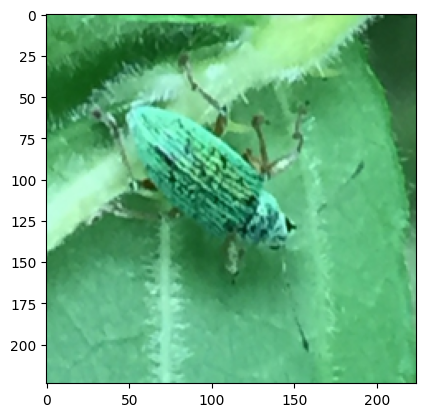

In [56]:
plt.imshow(train_data[1725])

In [57]:
train_labels[1725]

'Curculionidae'

#### **Train Model**

In [48]:
# Train the model
cnn_tf.fit(train_data, train_labels_int, epochs=10, validation_data=(val_data, val_labels_int))

Epoch 1/10
1250/1250 [==============================] - 1014s 811ms/step - loss: 7.0947 - accuracy: 0.0498 - val_loss: 6.4988 - val_accuracy: 0.0507
Epoch 2/10
  49/1250 [>.............................] - ETA: 16:12 - loss: 6.5041 - accuracy: 0.0466

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
accuracy = cnn_tf.evaluate(val_data_tf, val_labels_tf)
print(f'Validation Accuracy: {accuracy[1]}')

In [73]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load an example image (you can replace 'path/to/your/image.jpg' with the path to your image)
img = test_data[70]

# Convert the image to a NumPy array
x = image.img_to_array(img)

# Add an extra dimension to the array (ResNet50 expects batches of images)
x = np.expand_dims(x, axis=0)

# Preprocess the input image
x = preprocess_input(x)

# Make a prediction
predictions = model.predict(x)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 1s 728ms/step
1: cicada (0.77)
2: leafhopper (0.16)
3: lacewing (0.02)


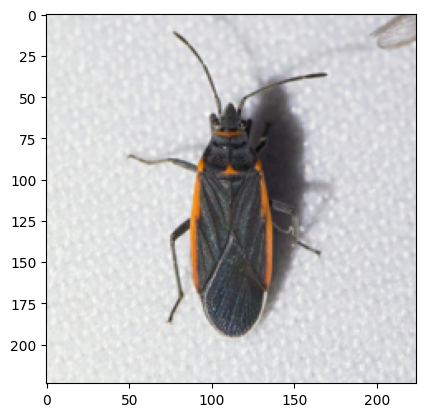

In [72]:
plt.imshow(test_data[70])